In [163]:
from importlib import reload
import scModel
reload(scModel)
myModel = scModel.Model(Del=1)
H = myModel.HBdG()

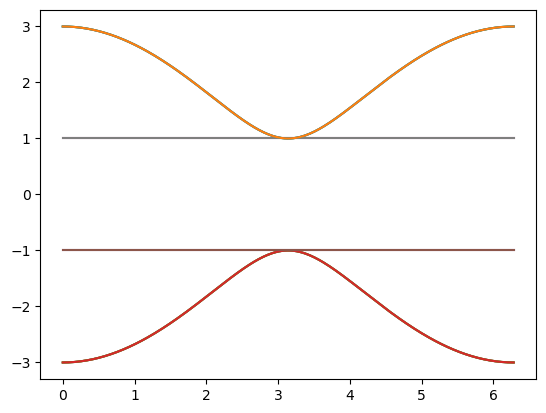

In [164]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 300)
energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
plt.plot(k, energies)

In [165]:
energies = myModel.solvHam(k, k)
energies

array([[-3.        , -2.99985281, -2.99941124, ..., -2.99941124,
        -2.99985281, -3.        ],
       [-3.        , -2.99985281, -2.99941124, ..., -2.99941124,
        -2.99985281, -3.        ],
       [-3.        , -2.99985281, -2.99941124, ..., -2.99941124,
        -2.99985281, -3.        ],
       ...,
       [ 3.        ,  2.99985281,  2.99941124, ...,  2.99941124,
         2.99985281,  3.        ],
       [ 3.        ,  2.99985281,  2.99941124, ...,  2.99941124,
         2.99985281,  3.        ],
       [ 3.        ,  2.99985281,  2.99941124, ...,  2.99941124,
         2.99985281,  3.        ]])

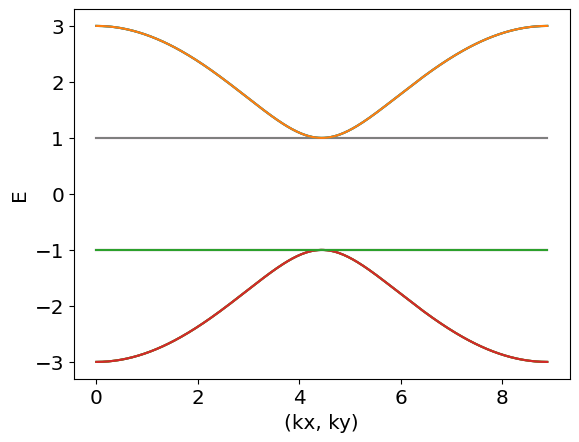

In [166]:
plt.xlabel("(kx, ky)", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

#k = np.linspace(0, 2*np.pi, 300)
energies = myModel.solvHam(k, k)
for i in energies:
    plt.plot(k*np.sqrt(2), i)

plt.plot(k*np.sqrt(2), energies[5])

plt.savefig("Pictures/Ebands_SC.png")
plt.show()

In [167]:
np.shape(energies)

(12, 300)

In [168]:
E = myModel.Es(k)
emax=np.amax(E)
Earr = np.linspace(-emax-2,emax+2,200)
emax

3.000000000000001

In [169]:
Earr

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869,
       -4.49748744, -4.44723618, -4.39698492, -4.34673367, -4.29648241,
       -4.24623116, -4.1959799 , -4.14572864, -4.09547739, -4.04522613,
       -3.99497487, -3.94472362, -3.89447236, -3.84422111, -3.79396985,
       -3.74371859, -3.69346734, -3.64321608, -3.59296482, -3.54271357,
       -3.49246231, -3.44221106, -3.3919598 , -3.34170854, -3.29145729,
       -3.24120603, -3.19095477, -3.14070352, -3.09045226, -3.04020101,
       -2.98994975, -2.93969849, -2.88944724, -2.83919598, -2.78894472,
       -2.73869347, -2.68844221, -2.63819095, -2.5879397 , -2.53768844,
       -2.48743719, -2.43718593, -2.38693467, -2.33668342, -2.28643216,
       -2.2361809 , -2.18592965, -2.13567839, -2.08542714, -2.03517588,
       -1.98492462, -1.93467337, -1.88442211, -1.83417085, -1.7839196 ,
       -1.73366834, -1.68341709, -1.63316583, -1.58291457, -1.53

In [170]:
np.shape(E)
#E

(12, 90300)

In [171]:
DOS1 = myModel.DOS(Earr, k, 2e-1)

In [172]:
DOS1

array([7.26626616e-19, 8.89617507e-18, 1.02317119e-16, 1.10550339e-15,
       1.12215683e-14, 1.07015039e-13, 9.58851225e-13, 8.07219446e-12,
       6.38537487e-11, 4.74632833e-10, 3.31535426e-09, 2.17635285e-08,
       1.34271795e-07, 7.78624609e-07, 4.24418409e-06, 2.17481121e-05,
       1.04773819e-04, 4.74608061e-04, 2.02172080e-03, 8.09971473e-03,
       3.05243597e-02, 1.08224530e-01, 3.61069412e-01, 1.13379932e+00,
       3.35173664e+00, 9.33071303e+00, 2.44687757e+01, 6.04679004e+01,
       1.40877390e+02, 3.09585640e+02, 6.42095802e+02, 1.25776497e+03,
       2.32881520e+03, 4.07969042e+03, 6.76980711e+03, 1.06556212e+04,
       1.59348221e+04, 2.26847130e+04, 3.08143764e+04, 4.00512069e+04,
       4.99741323e+04, 6.00902212e+04, 6.99347932e+04, 7.91653119e+04,
       8.76208781e+04, 9.53308701e+04, 1.02472302e+05, 1.09289056e+05,
       1.15993664e+05, 1.22674231e+05, 1.29227907e+05, 1.35339089e+05,
       1.40513982e+05, 1.44171095e+05, 1.45770427e+05, 1.44948082e+05,
      

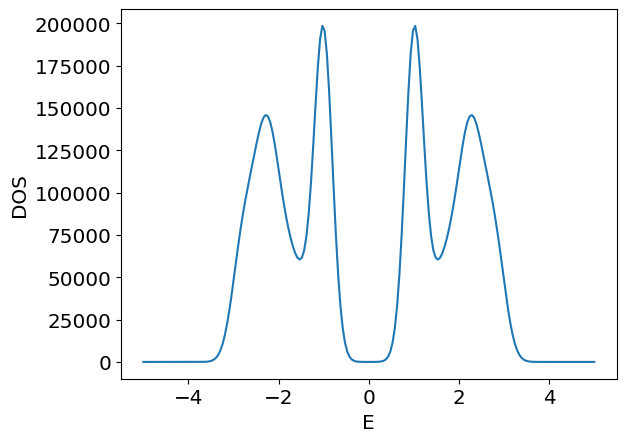

In [173]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC.png")
plt.show()